In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import requests

url = 'https://raw.githubusercontent.com/upkarsssharma/Bike_EDA_Assignment/63d15109d8bd324c3e4f856c5e93327c07f04936/BIKE%20DETAILS.csv'

# Download the content and read it into a DataFrame
try:
    df = pd.read_csv(io.StringIO(requests.get(url).text))
except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [42]:
#  What is the range of selling prices in the dataset?
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"The range of selling prices is: {selling_price_range} from {df['selling_price'].min()} to {df['selling_price'].max()}")

The range of selling prices is: 755000 from 5000 to 760000


In [44]:
# What is the median selling price for bikes in the dataset?
median_selling_price = df['selling_price'].median()
print(f"The median selling price is: {median_selling_price}")

The median selling price is: 45000.0


In [50]:
# What is the most common seller type?
most_common_seller_type = df['seller_type'].mode()[0]
print(f"The most common seller type is: {most_common_seller_type}")

The most common seller type is: Individual


In [52]:
#  How many bikes have driven more than 50,000 kilometers?
bikes_over_50k_km = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 kilometers: {bikes_over_50k_km}")

Number of bikes driven more than 50,000 kilometers: 170


In [54]:
#  What is the average km_driven value for each ownership type?
average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()
print("\nAverage km_driven value for each ownership type:")
print(average_km_driven_by_owner)


Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [56]:
# What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion_2015_or_older = bikes_2015_or_older / total_bikes
print(f"\nProportion of bikes from 2015 or older: {proportion_2015_or_older:.2f}")


Proportion of bikes from 2015 or older: 0.57


In [66]:
# What is the trend of missing values across the dataset?
print("\nTrend of missing values across the dataset:")
missing_values = df.isnull().sum()
missing_values

print(missing_values,"\n Here are missing values in dataset : \n",missing_values[missing_values > 0])


Trend of missing values across the dataset:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64 
 Here are missing values in dataset : 
 ex_showroom_price    435
dtype: int64


In [68]:
# What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price_row = df.loc[df['ex_showroom_price'].idxmax()]
highest_ex_showroom_price = highest_ex_showroom_price_row['ex_showroom_price']
bike_with_highest_ex_showroom_price = highest_ex_showroom_price_row['name']
print(f"\nThe highest ex_showroom_price recorded is: {highest_ex_showroom_price}")
print(f"The bike with the highest ex_showroom_price is: {bike_with_highest_ex_showroom_price}")


The highest ex_showroom_price recorded is: 1278000.0
The bike with the highest ex_showroom_price is: Harley-Davidson Street Bob


In [70]:
#  What is the total number of bikes listed by each seller type?
total_bikes_by_seller_type = df['seller_type'].value_counts()
print("\nTotal number of bikes listed by each seller type:")
print(total_bikes_by_seller_type)


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


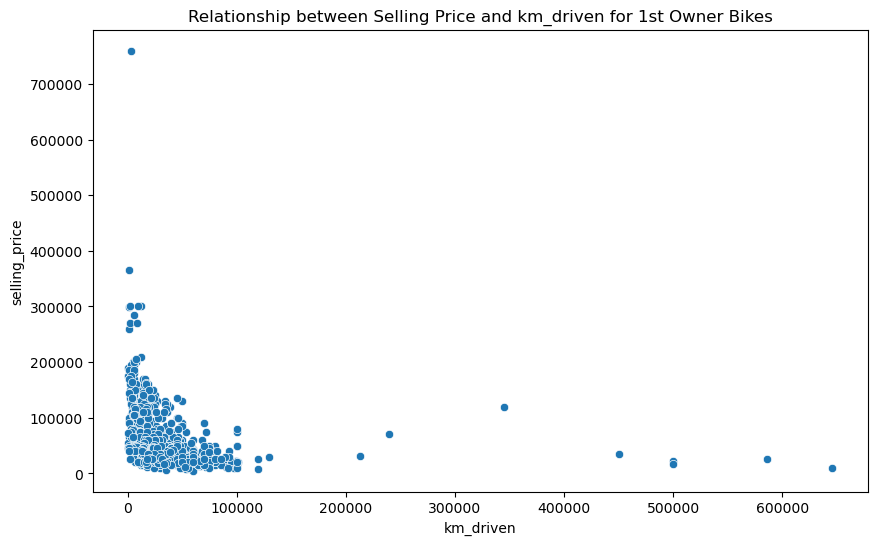

In [72]:
# What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_df = df[df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title('Relationship between Selling Price and km_driven for 1st Owner Bikes')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

In [12]:
# Identify and remove outliers in the km_driven column using the IQR methodB
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers_km_driven = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()
print(f"\nOriginal number of rows: {df.shape[0]}")
print(f"Number of rows after removing km_driven outliers: {df_no_outliers_km_driven.shape[0]}")


Original number of rows: 1061
Number of rows after removing km_driven outliers: 1022


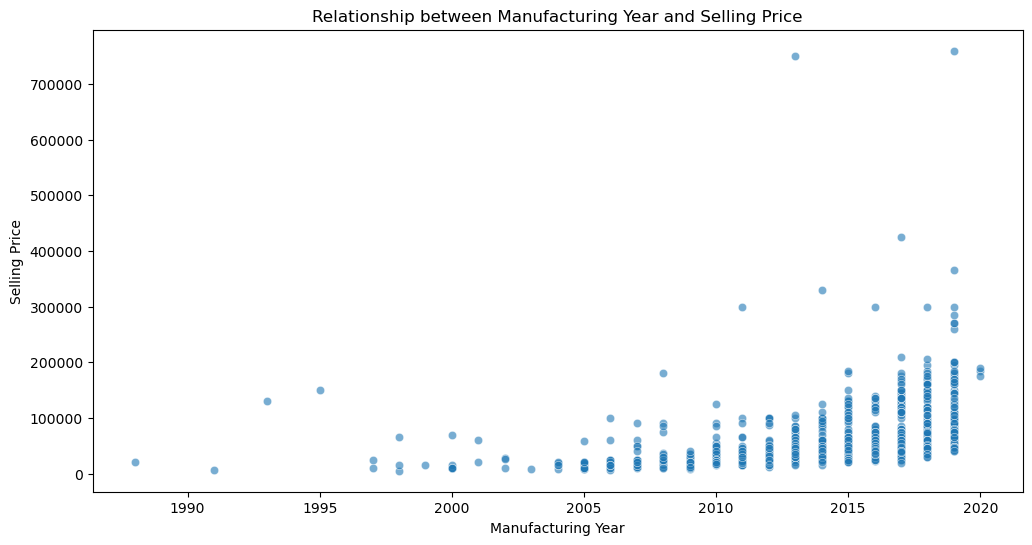

In [76]:
# Perform a bivariate analysis to visualize the relationship between year and selling_priceB
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)
plt.title('Relationship between Manufacturing Year and Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.show()

In [14]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)D
current_year = 2023 # Assuming the current year is 2023
df['bike_age'] = current_year - df['year']
average_selling_price_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()
print("\nAverage selling price by bike age:")
print(average_selling_price_by_age)


Average selling price by bike age:
    bike_age  selling_price
0          3  183333.333333
1          4  119689.511628
2          5   87660.374046
3          6   78894.736842
4          7   58469.018692
5          8   56500.000000
6          9   48668.131868
7         10   51136.986301
8         11   35748.400000
9         12   35655.721311
10        13   31793.333333
11        14   22267.857143
12        15   34289.285714
13        16   24927.586207
14        17   23380.000000
15        18   16978.571429
16        19   15100.000000
17        20    8000.000000
18        21   20666.666667
19        22   40000.000000
20        23   20833.333333
21        24   15000.000000
22        25   28333.333333
23        26   17500.000000
24        28  150000.000000
25        30  130000.000000
26        32    6000.000000
27        35   20000.000000


In [ ]:
# Which bike names are priced significantly above the average price for their manufacturing yearD
# Calculate average selling price per year
average_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()
average_price_per_year.rename(columns={'selling_price': 'avg_selling_price_for_year'})
df = df.merge(average_price_per_year, on='year', how='left')

In [138]:
#df_priced_significantly_above = df[df['selling_price']>df['avg_selling_price_for_year']]
#df_priced_significantly_above

In [144]:
# Identify bikes significantly above average (e.g., more than 50% above average)
df_with_avg['price_above_average'] = df_with_avg['selling_price'] > (df_with_avg['avg_selling_price_for_year'] * 1.5)

bikes_priced_significantly_above_average = df_with_avg[df_with_avg['price_above_average']][['name', 'year', 'selling_price', 'avg_selling_price_for_year']]
print("\nBikes priced significantly above the average price for their manufacturing year:")
print(bikes_priced_significantly_above_average)


Bikes priced significantly above the average price for their manufacturing year:
                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_selling_price_for_year  
2                  87660.374046  
7                  34289.285714  
13                11968

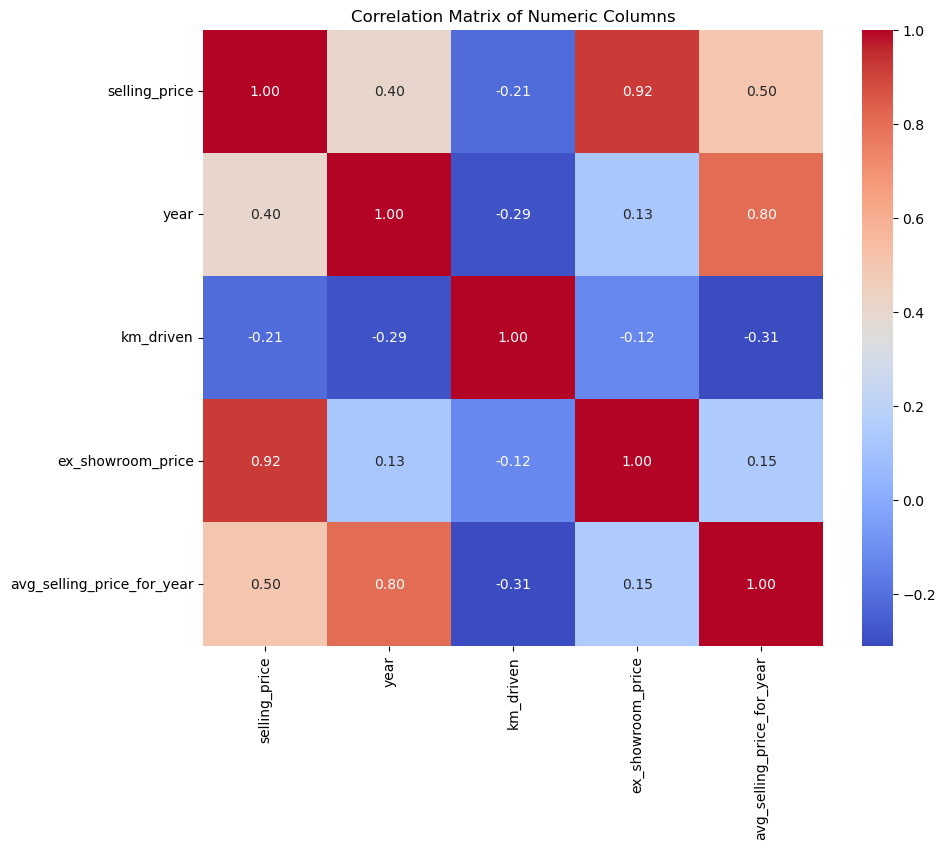

In [146]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()